Basically this is going to be a modified version of `analysis.ipynb` with an emphasis on getting that massive dataset into a more manageable state for doing the group project.

In [1]:
# Dataset loading
from rbclib import RBCPath
from pathlib import Path
# Bread and butter
import pandas as pd
import numpy as np

## Get participant list / metadata
Unchanged from `analysis`. By design the thing we're trying to predict is in this table.

In [2]:
# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

# Display the full dataframe:
all_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907,-0.449373,-0.630780,-1.842178,1
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061,0.531072,0.392751,0.190706,1
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375,-0.744118,-0.314187,-0.432662,1
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807,-0.896835,-0.449099,0.111167,1
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100,-0.313455,2.204168,-0.782266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN,-0.148520,0.556444,0.024228,1
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN,0.993806,1.578177,-0.373470,1
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN,-1.026645,-0.582212,1.333857,1
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN,0.360029,-0.515655,1.509584,114


#### Look at `p_factor` a lil bit

In [12]:
# Plotting imports
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings # shut up numpy.

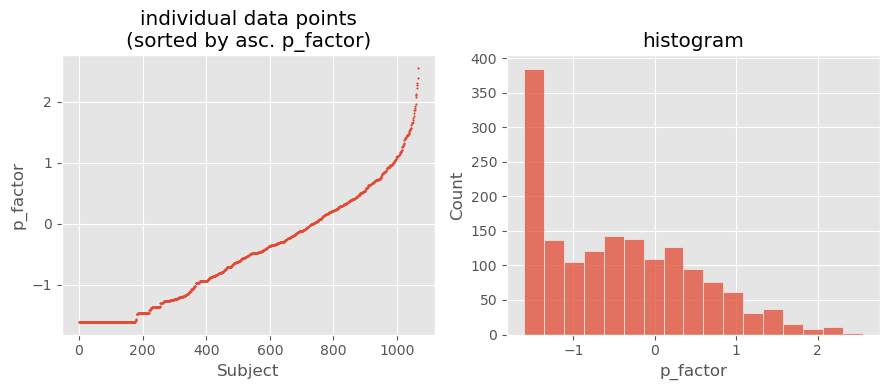

In [26]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pfac_asc = np.argsort(all_data['p_factor'])
plt.scatter(np.arange(len(pfac_asc)), all_data['p_factor'].values[pfac_asc], s=1);
plt.xlabel("Subject")
plt.ylabel("p_factor")
plt.title("individual data points\n(sorted by asc. p_factor)")
plt.subplot(1,2,2)
sns.histplot(data=all_data, x='p_factor')
plt.title("histogram")
plt.tight_layout();

## Call the dataset
this is the part that takes forever

PLEASE add the cache to your gitignore :)

In [109]:
def load_fsdata(participant_id, local_cache_dir=(Path.home() / 'cache')):
    "Loads and returns the dataframe of a PNC participant's FreeSurfer data."

    # Check that the local_cache_dir exists and make it if it doesn't.
    if local_cache_dir is not None:
        local_cache_dir = Path(local_cache_dir)
        local_cache_dir.mkdir(exist_ok=True)
    
    # Make the RBCPath and find the appropriate file:
    pnc_freesurfer_path = RBCPath(
        'rbc://PNC_FreeSurfer/freesurfer',
        # We provide the local_cache_dir to the RBCPath object; all paths made
        # from this object will use the same cache directory.
        local_cache_dir=local_cache_dir)
    participant_path = pnc_freesurfer_path / f'sub-{participant_id}'
    tsv_path = participant_path / f'sub-{participant_id}_regionsurfacestats.tsv'

    if os.path.isfile(tsv_path):
        # Use pandas to read in the TSV file:
        with tsv_path.open('r') as f:
            data = pd.read_csv(f, sep='\t')
    
        # Return the loaded data:
        return data
    else:
        print(f"No regionsurfacestats.tsv found for participant {participant_id}, skipping...")
        return None

In [130]:
# testing if i can loop this without my internet shitting the bed
import time
all_participants = np.unique(all_data['participant_id'].values)
print("dataset contains n =", all_participants.shape[0], "participants")
t1 = time.time()
df = load_fsdata(all_participants[0])
t2 = time.time()
print("Estimated time to loop this function is %.2f minutes." % (((t2-t1)*all_participants.shape[0])/60))

dataset contains n = 1601 participants
Estimated time to loop this function is 35.44 minutes.


eh, could be worse. i guess there is some marginal processing time added on by the next function so let's do that now.

In [36]:
# I tweaked load_ba1_surfarea() so it works for any roi/param.
# Loading fsdata within this function is slow so I decided to nix that.
def load_roi_param(participant_df, roi_name, param):
    """
    Loads and returns the bilateral value for a given
    parameter and ROI for all PNC study participants.

    Parameters
    ----------
    participant_df : pd.DataFrame
                     The output of load_fsdata() for a single subject.
    roi_name : str
               The name of the region you want the surface area for.
    param : str
            The parameter you wish to extract from the participant_df.

    Returns
    -------
    """
    # Next, find the relevant rows:
    row_mask = (participant_df['StructName'] == roi_name)
    # Then extract and sum the desired parameter:
    stereo_params = participant_df.loc[row_mask, param] # lh + rh
    roi_param = sum(stereo_params)
    # And return this value:
    return roi_param

In [40]:
# I'm sure some of these are better candidates than others lol
print("Possible parameters we could regress against p_factor are:", df.columns[5:].values)

Possible parameters we could regress against p_factor are: ['NumVert' 'SurfArea' 'GrayVol' 'ThickAvg' 'ThickStd' 'MeanCurv'
 'GausCurv' 'FoldInd' 'CurvInd' 'Index' 'SegId' 'Mean_wgpct'
 'StdDev_wgpct' 'Min_wgpct' 'Max_wgpct' 'Range_wgpct' 'SNR_wgpct'
 'Mean_piallgi' 'StdDev_piallgi' 'Min_piallgi' 'Max_piallgi'
 'Range_piallgi']


In [43]:
# ok. how long will this take.
from tqdm.notebook import tqdm
example_param = 'SurfArea' # keepin' it simple
all_rois = np.unique(df['StructName'].values)
print("dset contains", all_rois.shape[0], "rois per subj")
t1 = time.time()
df = load_fsdata(all_participants[1]) # diff index bc i'm paranoid
# Because we only load the data once this loop should be reasonably quick
pbar = tqdm(all_rois)
for roi in pbar:
    pbar.set_description(f"Loading {example_param} for {roi}")
    surfarea = load_roi_param(df, roi, example_param)
t2 = time.time()
# To estimate time, we have to multiply by number of ROIs AND number of subjs
est_time = ((t2-t1)*all_participants.shape[0]*all_rois.shape[0])/60
print("Extracting surface for every ROI from every subject would take %.2f minutes." % (((t2-t1)*all_participants.shape[0])/60))

dset contains 3924 rois per subj


  0%|          | 0/3924 [00:00<?, ?it/s]

Extracting surface for every ROI from every subject would take 167.70 minutes.


OK that's still not that bad relatively. I'm going to do this now and go eat dinner or something.

Format for the dataset that makes the most sense to me is creating one tsv per ROI. That tsv contains columns of params and rows of subjs. Each atlas is a folder.

For computational simplicitly I am going to convert some integers to floats. I don't know that this will actually matter for anything but I'm writing it down here for my sake.

In [113]:
import os
participant_dfs = dict()
pbar = tqdm(all_participants)
for subj in pbar:
    pbar.set_description(f"Loading data for participant {subj}...")
    participant_dfs[subj] = load_fsdata(subj)

  0%|          | 0/1601 [00:00<?, ?it/s]

No regionsurfacestats.tsv found for participant 219325366, skipping...
No regionsurfacestats.tsv found for participant 495793681, skipping...
No regionsurfacestats.tsv found for participant 533698126, skipping...
No regionsurfacestats.tsv found for participant 1342487188, skipping...
No regionsurfacestats.tsv found for participant 1649551035, skipping...
No regionsurfacestats.tsv found for participant 2003542642, skipping...
No regionsurfacestats.tsv found for participant 2249226316, skipping...
No regionsurfacestats.tsv found for participant 4184549693, skipping...
No regionsurfacestats.tsv found for participant 4205323727, skipping...


In [119]:
import pickle
with open('data/fsdata.pkl', 'wb') as f:
    pickle.dump(participant_dfs, f)

In [125]:
print(np.unique(df['atlas'].values))

['AAL' 'BA_exvivo' 'CC200' 'CC400' 'HOCPATh25' 'Juelich'
 'PALS_B12_Brodmann' 'Schaefer2018_1000Parcels_17Networks_order'
 'Schaefer2018_1000Parcels_7Networks_order'
 'Schaefer2018_100Parcels_17Networks_order'
 'Schaefer2018_100Parcels_7Networks_order'
 'Schaefer2018_200Parcels_17Networks_order'
 'Schaefer2018_200Parcels_7Networks_order'
 'Schaefer2018_300Parcels_17Networks_order'
 'Schaefer2018_300Parcels_7Networks_order'
 'Schaefer2018_400Parcels_17Networks_order'
 'Schaefer2018_400Parcels_7Networks_order'
 'Schaefer2018_500Parcels_17Networks_order'
 'Schaefer2018_500Parcels_7Networks_order'
 'Schaefer2018_600Parcels_17Networks_order'
 'Schaefer2018_600Parcels_7Networks_order'
 'Schaefer2018_700Parcels_17Networks_order'
 'Schaefer2018_700Parcels_7Networks_order'
 'Schaefer2018_800Parcels_17Networks_order'
 'Schaefer2018_800Parcels_7Networks_order'
 'Schaefer2018_900Parcels_17Networks_order'
 'Schaefer2018_900Parcels_7Networks_order' 'Slab'
 'Yeo2011_17Networks_N1000' 'Yeo2011_7Networ

In [132]:
# arbitrarily picking some atlases I like
atlases = ['AAL', 'glasser', 'aparc.a2009s', 'PALS_B12_Brodmann']
all_params = df.columns[5:].values
pbar = tqdm([p for p in all_participants if participant_dfs[p] is not None])

# Get attributes (this is what takes forever)
t1 = time.time()
atlas_dat = {atlas:None for atlas in atlases}
for ii,subj in enumerate(pbar):
    pbar.set_description(f"Extracting parameters for participant {subj}...")
    pdf = participant_dfs[subj]
    for atlas in atlases:
        atlas_rois = np.unique(pdf.loc[pdf['atlas']==atlas]['StructName'].values)
        if atlas_dat[atlas] is None:
            atlas_dat[atlas] = np.zeros((len(all_participants), len(atlas_rois), len(all_params)))
        adf = pdf.loc[pdf['atlas'] == atlas]        
        for jj,roi in enumerate(atlas_rois):
            rdf = adf.loc[adf['StructName']==roi]
            atlas_dat[atlas][ii,jj,:] = rdf.iloc[:,5:].values.sum(axis=0)

# ok i finished this in the next cell hence the error ... 

  0%|          | 0/1592 [00:00<?, ?it/s]

Saving to .tsvs...


  0%|          | 0/4 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [134]:
# Format into dataframes and save to tsv (Hopefully takes less time)
print("Saving to .tsvs...")
pbar = tqdm(atlases)
for atlas in pbar:
    pbar.set_description(f"Saving .tsv files for {atlas}...")
    if not os.path.isdir(f'./data/regionsurfacestats/{atlas}'):
        os.mkdir(f'./data/regionsurfacestats/{atlas}')
    atlas_rois = np.unique(df.loc[df['atlas']==atlas]['StructName'].values)
    dframes = {roi:pd.DataFrame(columns = ['participant_id'] + list(all_params)) for roi in atlas_rois}
    for jj,roi in enumerate(atlas_rois):
        dframes[roi]['participant_id'] = all_participants
        for kk,param in enumerate(all_params):
            dframes[roi][param] = atlas_dat[atlas][:,jj,kk]
        # Write
        dframes[roi].to_csv(f'./data/regionsurfacestats/{atlas}/{roi}.tsv' ,sep='\t', index=False)
t2 = time.time()
print("Operation took %.2f minutes." % ((t2-t1)/60))

Saving to .tsvs...


  0%|          | 0/4 [00:00<?, ?it/s]

Operation took 9.33 minutes.
